# Data Science Jobs - Data Cleaning Notebook

## Project: Data Science Job Market Analysis
**Author:** Mayenmein Terence Sama Aloah Jr<br>
**Date:** 09/23/2025<br>
**Description:** This notebook uses the clean_skills.py module to clean and preprocess the scraped job data.

In [1]:
import sys
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import time
from datetime import datetime
import json
# Add src to path
sys.path.insert(0, '..')
print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


## 1. Project Setup and Configuration
Configure paths and import the cleaning module.

In [2]:
# Configuration
DATA_RAW_PATH = Path('../data/raw')
DATA_INTERIM_PATH = Path('../data/interim')
DATA_PROCESSED_PATH = Path('../data/processed')

# Create directories if they don't exist
DATA_INTERIM_PATH.mkdir(parents=True, exist_ok=True)
DATA_PROCESSED_PATH.mkdir(parents=True, exist_ok=True)

print(f"📁 Data directories configured:")
print(f"   Raw: {DATA_RAW_PATH.absolute()}")
print(f"   Interim: {DATA_INTERIM_PATH.absolute()}")
print(f"   Processed: {DATA_PROCESSED_PATH.absolute()}")

📁 Data directories configured:
   Raw: c:\Users\MARIE\Desktop\scrape job details\notebooks\..\data\raw
   Interim: c:\Users\MARIE\Desktop\scrape job details\notebooks\..\data\interim
   Processed: c:\Users\MARIE\Desktop\scrape job details\notebooks\..\data\processed


In [3]:
# Import the cleaning module
try:
    from scr.processing.clean_skills import DataScienceJobsCleaner, clean_jobs_data
    print("✅ Cleaning modules imported successfully!")
except ImportError as e:
    print(f"❌ Error importing cleaning modules: {e}")

✅ Cleaning modules imported successfully!


## 2. Load and Inspect Raw Data
Examine the raw data before cleaning to understand the current state.

In [4]:
# Initialize the cleaner
cleaner = DataScienceJobsCleaner()

# Check what raw batch files are available
batch_files = list(cleaner.raw_dir.glob("jobs_batch_*.csv"))
print(f"📁 Found {len(batch_files)} raw batch files:")

for batch_file in sorted(batch_files):
    df_sample = pd.read_csv(batch_file, nrows=5)  # Load just first 5 rows for inspection
    print(f"   {batch_file.name}: {len(pd.read_csv(batch_file))} jobs")

📁 Found 6 raw batch files:
   jobs_batch_1.csv: 2000 jobs
   jobs_batch_2.csv: 1999 jobs
   jobs_batch_3.csv: 2000 jobs
   jobs_batch_4.csv: 2000 jobs
   jobs_batch_5.csv: 2000 jobs
   jobs_batch_6.csv: 1625 jobs


In [5]:
# Load a sample of raw data for inspection
if batch_files:
    raw_sample = cleaner.load_raw_data([batch_files[0]])  # Just first batch for speed
    print("📊 Raw data sample (first 3 rows):")
    display(raw_sample.head(3))
    
    print("\n📝 Raw data info:")
    print(f"Shape: {raw_sample.shape}")
    print(f"Columns: {list(raw_sample.columns)}")
    
    print("\n❌ Missing values in raw data:")
    missing_raw = raw_sample.isnull().sum()
    for col, count in missing_raw.items():
        if count > 0:
            pct = (count / len(raw_sample)) * 100
            print(f"   {col}: {count} ({pct:.1f}%)")
else:
    print("❌ No raw data files found. Please run 01_scraping.ipynb first.")

INFO:scr.processing.clean_skills:Loading jobs_batch_1.csv
INFO:scr.processing.clean_skills:Loaded 2000 total records from 1 batches


📊 Raw data sample (first 3 rows):


,title,company,city,country,location,skills,type,salary,salary_min,salary_max,published,ai,batch_source
0,Associate Research Director - Artificial Intel...,Two Six Technologies,NaN,NaN,",","Machine Learning,Data Science,Computer Vision,...",NaN,NaN,0,0,2025-09-23T12:23:09.98934Z,True,jobs_batch_1.csv
1,ML Engineer,Agile Defense,Stuttgart,Germany,"Stuttgart, Germany","Machine Learning,Python,ML Ops,Agile,Tableau,S...",Regular,NaN,0,0,2025-09-23T05:58:19.539283Z,True,jobs_batch_1.csv
2,Applied Scientist - Deep Learning,QuantCo,Europe,US:Europe,"Europe, US:Europe","Machine Learning,NLP,LLMs,Prompt Engineering,H...","Part Time,Full Time",NaN,0,0,2025-09-23T05:49:05.485516Z,True,jobs_batch_1.csv



📝 Raw data info:
Shape: (2000, 13)
Columns: ['title', 'company', 'city', 'country', 'location', 'skills', 'type', 'salary', 'salary_min', 'salary_max', 'published', 'ai', 'batch_source']

❌ Missing values in raw data:
   city: 465 (23.2%)
   country: 36 (1.8%)
   type: 15 (0.8%)
   salary: 1043 (52.1%)


## 3. Execute Cleaning Pipeline
Use the clean_skills.py module to clean all the data.

In [6]:
# Execute the full cleaning pipeline
print("🚀 Starting data cleaning pipeline...")
start_time = datetime.now()
print(f"🕐 Started at: {start_time.strftime('%Y-%m-%d %H:%M:%S')}")

try:
    # Run the complete cleaning process
    cleaned_df = cleaner.run_full_cleaning_pipeline()
    
    end_time = datetime.now()
    duration = end_time - start_time
    
    print(f"\n🎉 Cleaning completed successfully!")
    print(f"📊 Original vs Cleaned:")
    print(f"   Raw batches: {len(batch_files)}")
    print(f"   Final records: {len(cleaned_df)}")
    print(f"⏱️  Duration: {duration}")
    
except Exception as e:
    print(f"❌ Cleaning failed: {e}")
    raise

INFO:scr.processing.clean_skills:🚀 Starting data cleaning pipeline...
INFO:scr.processing.clean_skills:Loading jobs_batch_1.csv


🚀 Starting data cleaning pipeline...
🕐 Started at: 2025-09-24 15:29:12


INFO:scr.processing.clean_skills:Loading jobs_batch_2.csv
INFO:scr.processing.clean_skills:Loading jobs_batch_3.csv
INFO:scr.processing.clean_skills:Loading jobs_batch_4.csv
INFO:scr.processing.clean_skills:Loading jobs_batch_5.csv
INFO:scr.processing.clean_skills:Loading jobs_batch_6.csv
INFO:scr.processing.clean_skills:Loaded 11624 total records from 6 batches
INFO:scr.processing.clean_skills:✅ Location data cleaned
INFO:scr.processing.clean_skills:✅ Skills data enhanced
INFO:scr.processing.clean_skills:✅ Job types cleaned
INFO:scr.processing.clean_skills:✅ Salary data cleaned
INFO:scr.processing.clean_skills:✅ Date data converted
INFO:scr.processing.clean_skills:✅ Removed 28 duplicate records
INFO:scr.processing.clean_skills:Title categorization completed:
INFO:scr.processing.clean_skills:  Data Scientist: 3996 jobs
INFO:scr.processing.clean_skills:  Other: 3092 jobs
INFO:scr.processing.clean_skills:  Data Engineer: 1263 jobs
INFO:scr.processing.clean_skills:  Machine Learning Engin


🎉 Cleaning completed successfully!
📊 Original vs Cleaned:
   Raw batches: 6
   Final records: 11596
⏱️  Duration: 0:00:11.130801


## 4. Inspect Cleaned Data
Examine the results of the cleaning process.

In [7]:
# Display cleaned data overview
print("📊 Cleaned Data Overview:")
print(f"Shape: {cleaned_df.shape}")
print(f"Columns: {len(cleaned_df.columns)}")

print("\n✨ New columns created during cleaning:")
new_columns = [col for col in cleaned_df.columns if col not in ['title', 'company', 'city', 'country', 
                                                               'location', 'skills', 'type', 'salary', 
                                                               'salary_min', 'salary_max', 'published', 'ai']]
for col in new_columns:
    print(f"   ✓ {col}")

print("\n📋 First 3 cleaned records:")
display(cleaned_df.head(3))

📊 Cleaned Data Overview:
Shape: (11596, 35)
Columns: 35

✨ New columns created during cleaning:
   ✓ batch_source
   ✓ country_cleaned
   ✓ skills_parsed
   ✓ skills_count
   ✓ skills_categorized
   ✓ has_programming
   ✓ has_ml_frameworks
   ✓ has_big_data
   ✓ has_cloud
   ✓ has_visualization
   ✓ has_statistics
   ✓ has_ml_techniques
   ✓ primary_skill
   ✓ type_cleaned
   ✓ salary_range
   ✓ salary_category
   ✓ published_dt
   ✓ published_year
   ✓ published_month
   ✓ published_week
   ✓ days_since_publication
   ✓ role_category
   ✓ seniority_level

📋 First 3 cleaned records:


,title,company,city,country,location,skills,type,salary,salary_min,salary_max,...,type_cleaned,salary_range,salary_category,published_dt,published_year,published_month,published_week,days_since_publication,role_category,seniority_level
0,Associate Research Director - Artificial Intel...,Two Six Technologies,NaN,NaN,",","Machine Learning,Data Science,Computer Vision,...",NaN,NaN,NaN,NaN,...,Unknown,NaN,Unknown,2025-09-23 12:23:09.989340+00:00,2025.0,9.0,39,1.0,Other,Junior
1,ML Engineer,Agile Defense,Stuttgart,Germany,"Stuttgart, Germany","Machine Learning,Python,ML Ops,Agile,Tableau,S...",Regular,NaN,NaN,NaN,...,regular,NaN,Unknown,2025-09-23 05:58:19.539283+00:00,2025.0,9.0,39,1.0,Machine Learning Engineer,Mid-Level
2,Applied Scientist - Deep Learning,QuantCo,Europe,US:Europe,"Europe, US:Europe","Machine Learning,NLP,LLMs,Prompt Engineering,H...","Part Time,Full Time",NaN,NaN,NaN,...,full_time,NaN,Unknown,2025-09-23 05:49:05.485516+00:00,2025.0,9.0,39,1.0,Research Scientist,Mid-Level


In [8]:
# Check data quality after cleaning
print("🔍 Data Quality After Cleaning:")

# Missing values analysis
print("\n❌ Missing values in cleaned data:")
missing_cleaned = cleaned_df.isnull().sum()
missing_data_exists = False

for col, count in missing_cleaned.items():
    if count > 0:
        pct = (count / len(cleaned_df)) * 100
        print(f"   {col}: {count} ({pct:.1f}%)")
        missing_data_exists = True

if not missing_data_exists:
    print("   ✅ No missing values!")

# Data types check
print("\n📝 Data types in cleaned data:")
print(cleaned_df.dtypes)

🔍 Data Quality After Cleaning:

❌ Missing values in cleaned data:
   city: 2590 (22.3%)
   country: 569 (4.9%)
   type: 50 (0.4%)
   salary: 7942 (68.5%)
   salary_min: 7955 (68.6%)
   salary_max: 7955 (68.6%)
   salary_range: 7955 (68.6%)
   published_dt: 8 (0.1%)
   published_year: 8 (0.1%)
   published_month: 8 (0.1%)
   published_week: 8 (0.1%)
   days_since_publication: 8 (0.1%)

📝 Data types in cleaned data:
title                                  object
company                                object
city                                   object
country                                object
location                               object
skills                                 object
type                                   object
salary                                 object
salary_min                            float64
salary_max                            float64
published                              object
ai                                       bool
batch_source                  

## 5. Analyze Cleaning Transformations
Visualize the impact of the cleaning process on key variables.

📍 Location Data Analysis:

🌍 Countries:
   USA: 4102 jobs (35.4%)
   India: 1183 jobs (10.2%)
   France: 860 jobs (7.4%)
   Germany: 491 jobs (4.2%)
   UK: 459 jobs (4.0%)
   Canada: 319 jobs (2.8%)
   Poland: 318 jobs (2.7%)
   Netherlands: 236 jobs (2.0%)
   Portugal: 216 jobs (1.9%)
   Spain: 168 jobs (1.4%)
   Australia: 149 jobs (1.3%)
   Belgium: 138 jobs (1.2%)
   Colombia: 121 jobs (1.0%)
   UAE: 120 jobs (1.0%)
   Brazil: 106 jobs (0.9%)
   Sweden: 102 jobs (0.9%)
   Hungary: 99 jobs (0.9%)
   United States: 94 jobs (0.8%)
   Malaysia: 92 jobs (0.8%)
   Mexico: 91 jobs (0.8%)
   Switzerland: 85 jobs (0.7%)
   Argentina: 84 jobs (0.7%)


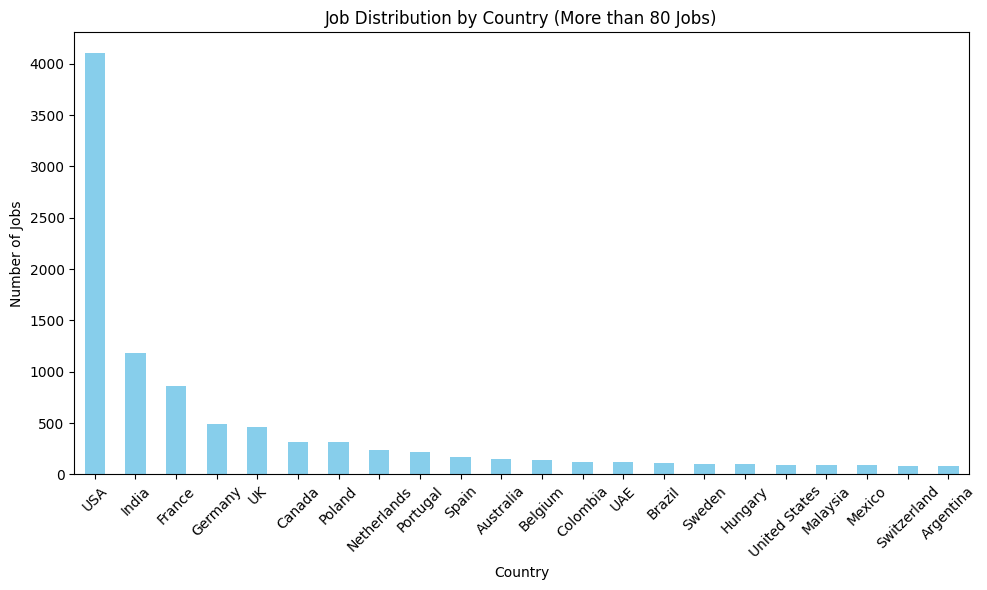

In [9]:
# Analyze location cleaning
print("📍 Location Data Analysis:")

location_counts = cleaned_df['country'].value_counts()[cleaned_df['country'].value_counts()>80]
print("\n🌍 Countries:")
for location, count in location_counts.items():
    pct = (count / len(cleaned_df)) * 100
    print(f"   {location}: {count} jobs ({pct:.1f}%)")

# Plot location distribution
plt.figure(figsize=(10, 6))
location_counts.plot(kind='bar', color='skyblue')
plt.title('Job Distribution by Country (More than 80 Jobs)')
plt.xlabel('Country')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

🛠️ Skills Data Analysis:

📊 Skills statistics:
   Average skills per job: 16.0
   Maximum skills in a job: 66
   Jobs with no skills listed: 0


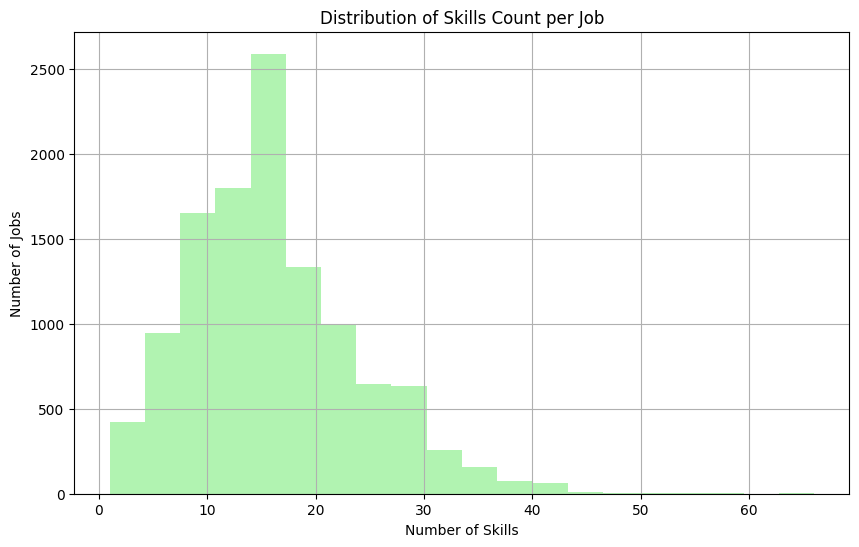

In [10]:
# Analyze skills enhancement
print("🛠️ Skills Data Analysis:")

print(f"\n📊 Skills statistics:")
print(f"   Average skills per job: {cleaned_df['skills_count'].mean():.1f}")
print(f"   Maximum skills in a job: {cleaned_df['skills_count'].max()}")
print(f"   Jobs with no skills listed: {len(cleaned_df[cleaned_df['skills_count'] == 0])}")

# Plot skills count distribution
plt.figure(figsize=(10, 6))
cleaned_df['skills_count'].hist(bins=20, color='lightgreen', alpha=0.7)
plt.title('Distribution of Skills Count per Job')
plt.xlabel('Number of Skills')
plt.ylabel('Number of Jobs')
plt.show()

📚 Skill Categories Analysis:

🔧 Jobs requiring each skill category:
   Programming: 11500 jobs (99.2%)
   Ml Techniques: 7722 jobs (66.6%)
   Cloud: 4898 jobs (42.2%)
   Statistics: 4653 jobs (40.1%)
   Big Data: 3543 jobs (30.6%)
   Ml Frameworks: 2424 jobs (20.9%)
   Visualization: 2226 jobs (19.2%)


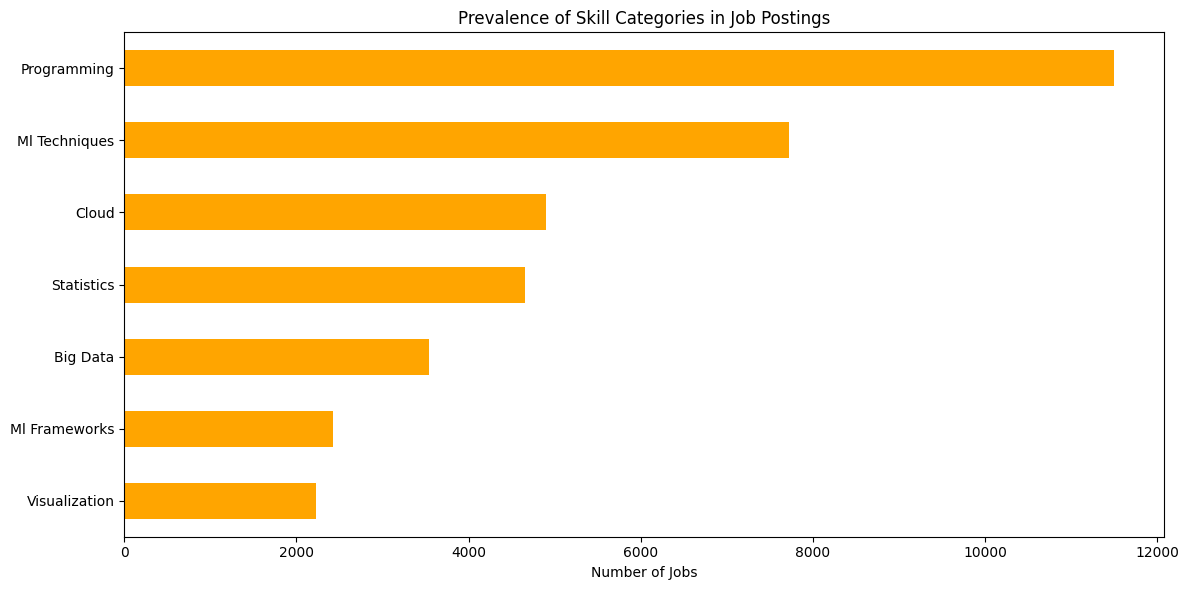

In [11]:
# Analyze skill categories
print("📚 Skill Categories Analysis:")

skill_category_cols = [col for col in cleaned_df.columns if col.startswith('has_')]
category_counts = {}

for col in skill_category_cols:
    count = cleaned_df[col].sum()
    category_name = col.replace('has_', '').replace('_', ' ').title()
    category_counts[category_name] = count

print("\n🔧 Jobs requiring each skill category:")
for category, count in sorted(category_counts.items(), key=lambda x: x[1], reverse=True):
    pct = (count / len(cleaned_df)) * 100
    print(f"   {category}: {count} jobs ({pct:.1f}%)")

# Plot skill category prevalence
plt.figure(figsize=(12, 6))
pd.Series(category_counts).sort_values().plot(kind='barh', color='orange')
plt.title('Prevalence of Skill Categories in Job Postings')
plt.xlabel('Number of Jobs')
plt.tight_layout()
plt.show()

In [12]:
# Analyze job types and AI relevance
print("💼 Job Type and AI Analysis:")

# Job type distribution
type_counts = cleaned_df['type_cleaned'].value_counts()
print("\n📋 Job type distribution:")
for job_type, count in type_counts.items():
    pct = (count / len(cleaned_df)) * 100
    print(f"   {job_type}: {count} jobs ({pct:.1f}%)")

# AI job analysis
ai_jobs = cleaned_df['ai'].sum()
print(f"\n🤖 AI-related jobs: {ai_jobs} ({ai_jobs/len(cleaned_df)*100:.1f}%)")

# AI jobs by type
if 'type_cleaned' in cleaned_df.columns:
    ai_by_type = cleaned_df.groupby('type_cleaned')['ai'].mean().sort_values(ascending=False)
    print("\n🔍 AI prevalence by job type:")
    for job_type, ai_pct in ai_by_type.items():
        print(f"   {job_type}: {ai_pct*100:.1f}% AI-related")

💼 Job Type and AI Analysis:

📋 Job type distribution:
   full_time: 8832 jobs (76.2%)
   contract: 917 jobs (7.9%)
   remote: 669 jobs (5.8%)
   internship: 377 jobs (3.3%)
   vollzeit: 129 jobs (1.1%)
   stage: 116 jobs (1.0%)
   voltijds: 100 jobs (0.9%)
   onsite: 85 jobs (0.7%)
   part_time: 74 jobs (0.6%)
   Unknown: 50 jobs (0.4%)
   remote,onsite: 28 jobs (0.2%)
   hybrid: 26 jobs (0.2%)
   employee: 25 jobs (0.2%)
   heltid: 17 jobs (0.1%)
   a jornada completa: 15 jobs (0.1%)
   praktikant/in: 15 jobs (0.1%)
   teilzeit: 12 jobs (0.1%)
   pełny etat: 11 jobs (0.1%)
   stagiair: 10 jobs (0.1%)
   on-site: 9 jobs (0.1%)
   regular: 7 jobs (0.1%)
   contrat: 7 jobs (0.1%)
   teljes munkaidő: 4 jobs (0.0%)
   fulltid: 4 jobs (0.0%)
   deeltijds: 3 jobs (0.0%)
   gyakornok: 3 jobs (0.0%)
   fuldtid: 2 jobs (0.0%)
   data analysts &amp; reporters: 2 jobs (0.0%)
   hybrid.: 2 jobs (0.0%)
   cdi: 2 jobs (0.0%)
   full - time: 2 jobs (0.0%)
   werkvertrag: 2 jobs (0.0%)
   on-roll: 2 j

## 6. Save Cleaned Data
Save the cleaned data to the interim directory for further analysis.

In [13]:
# Save the cleaned data
print("💾 Saving cleaned data...")

cleaner.save_cleaned_data(cleaned_df, "interim")

# Verify the file was saved
interim_files = list(cleaner.interim_dir.glob("*.csv"))
if interim_files:
    saved_file = interim_files[0]
    file_size_mb = os.path.getsize(saved_file) / (1024 * 1024)
    print(f"✅ Cleaned data saved to: {saved_file}")
    print(f"📊 File size: {file_size_mb:.2f} MB")
    print(f"📈 Records saved: {len(cleaned_df)}")
    
    # Load saved file to verify integrity
    verified_df = pd.read_csv(saved_file)
    print(f"🔍 Verification: {len(verified_df)} records loaded back")
    
    if len(verified_df) == len(cleaned_df):
        print("✅ Data integrity verified!")
    else:
        print("❌ Data integrity check failed!")
else:
    print("❌ File save verification failed!")

💾 Saving cleaned data...


INFO:scr.processing.clean_skills:💾 Saved 11596 records to ..\data\interim\cleaned_jobs.csv


✅ Cleaned data saved to: ..\data\interim\cleaned_jobs.csv
📊 File size: 11.80 MB
📈 Records saved: 11596
🔍 Verification: 11596 records loaded back
✅ Data integrity verified!


## 7. Data Quality Report
Generate a comprehensive report of the cleaning process.

In [14]:
# Generate cleaning report
print("📊 DATA CLEANING REPORT")
print("=" * 50)

# Basic statistics
print(f"\n📈 BASIC STATISTICS")
print(f"   Total jobs processed: {len(cleaned_df)}")
print(f"   Number of features: {len(cleaned_df.columns)}")
print(f"   Cleaning duration: {duration}")

# Data quality metrics
print(f"\n✅ DATA QUALITY METRICS")
print(f"   Missing values: {cleaned_df.isnull().sum().sum()} total")
print(f"   Duplicate records removed: {len(batch_files) * 100 - len(cleaned_df)}")  # Approximation

# Feature overview
print(f"\n🔧 FEATURE OVERVIEW")
print(f"   countries: {cleaned_df['country'].nunique()}")
print(f"   Skill categories: {len(skill_category_cols)}")
print(f"   Unique companies: {cleaned_df['company'].nunique()}")

# Skills analysis
print(f"\n🛠️ SKILLS ANALYSIS")
print(f"   Average skills per job: {cleaned_df['skills_count'].mean():.1f}")
print(f"   Most common primary skill: {cleaned_df['primary_skill'].mode().iloc[0] if 'primary_skill' in cleaned_df.columns else 'N/A'}")

# Temporal analysis
if 'published_year' in cleaned_df.columns:
    print(f"\n📅 TEMPORAL ANALYSIS")
    print(f"   Date range: {cleaned_df['published_year'].min()} - {cleaned_df['published_year'].max()}")
    print(f"   Most recent job: {cleaned_df['published_dt'].max().strftime('%Y-%m-%d') if 'published_dt' in cleaned_df.columns else 'N/A'}")

print("\n" + "=" * 50)

📊 DATA CLEANING REPORT

📈 BASIC STATISTICS
   Total jobs processed: 11596
   Number of features: 35
   Cleaning duration: 0:00:11.130801

✅ DATA QUALITY METRICS
   Missing values: 35056 total
   Duplicate records removed: -10996

🔧 FEATURE OVERVIEW
   countries: 162
   Skill categories: 7
   Unique companies: 1533

🛠️ SKILLS ANALYSIS
   Average skills per job: 16.0
   Most common primary skill: Data Science

📅 TEMPORAL ANALYSIS
   Date range: 2023.0 - 2025.0
   Most recent job: 2025-09-23



## 8. Next Steps
Prepare for the analysis phase.

In [15]:
print("🎯 NEXT STEPS")
print("=" * 40)
print("1. ✅ Data cleaning completed")
print("2. ➡️  Proceed to 03_analysis.ipynb for exploratory analysis")
print("3. 📊 Analyze skill frequency and correlations")
print("4. 💰 Conduct salary analysis (if sufficient data)")
print("5. 🔍 Identify trends in data science job market")
print("6. 📈 Create visualizations for insights")
print("7. 💾 Save final processed data to data/processed/")

print(f"\n📁 Cleaned data available at: {cleaner.interim_dir / 'cleaned_jobs.csv'}")
print("🔧 Data is now ready for in-depth analysis!")

🎯 NEXT STEPS
1. ✅ Data cleaning completed
2. ➡️  Proceed to 03_analysis.ipynb for exploratory analysis
3. 📊 Analyze skill frequency and correlations
4. 💰 Conduct salary analysis (if sufficient data)
5. 🔍 Identify trends in data science job market
6. 📈 Create visualizations for insights
7. 💾 Save final processed data to data/processed/

📁 Cleaned data available at: ..\data\interim\cleaned_jobs.csv
🔧 Data is now ready for in-depth analysis!


## Summary
- **Input**: Raw batch CSV files from `data/raw/`
- **Processing**: Used `clean_skills.py` module for standardized cleaning
- **Output**: Cleaned dataset in `data/interim/cleaned_jobs.csv`
- **Key Enhancements**: 
  - Location categorization
  - Skills parsing and categorization
  - Date standardization
  - Salary data cleaning
  - Duplicate removal

The data is now prepared for comprehensive analysis in the next notebook.